In [2]:
import tensorflow as tf
print(tf.__version__) # 2.18.0
print(tf.config.list_physical_devices('GPU')) # [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2.18.0
[]


In [7]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, y.shape) # (569, 30) (569,)
# print(data.feature_names) # ['mean radius' 'mean texture' 'mean perimeter' 'mean area'

df = DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

print(data.target_names) # ['malignant' 'benign']


(569, 30) (569,)
['malignant' 'benign']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
N, D = X_train.shape
print(N, D) # train:455 test:30


455 30
569


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(len(X_train))
print(len(X_test))
print("---------")
print(len(df))


455
114
---------
569


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8475 - loss: 0.3784 - val_accuracy: 0.8684 - val_loss: 0.3738
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8896 - loss: 0.3268 - val_accuracy: 0.9123 - val_loss: 0.3335
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8938 - loss: 0.3107 - val_accuracy: 0.9386 - val_loss: 0.3004
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9144 - loss: 0.2732 - val_accuracy: 0.9561 - val_loss: 0.2751
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9280 - loss: 0.2649 - val_accuracy: 0.9649 - val_loss: 0.2538
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9334 - loss: 0.2358 - val_accuracy: 0.9649 - val_loss: 0.2360
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9347 - loss: 0.2311 - val_accuracy: 0.9649 - val_loss: 0.2206
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9420 - loss: 0.2117 - val_accuracy: 0.9737 - 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0674 
[0.0788271501660347, 0.9824175834655762]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0688 
[0.06291104853153229, 0.9824561476707458]
---------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9815 - loss: 0.0688


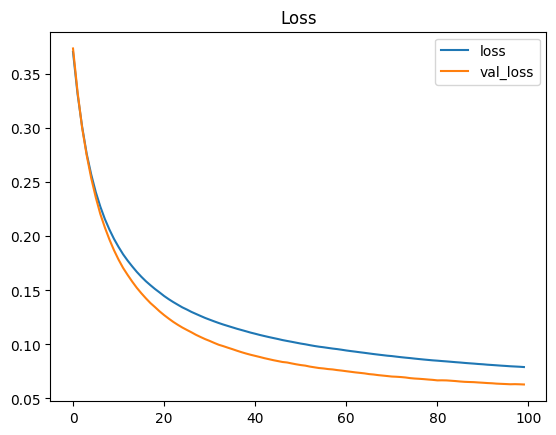

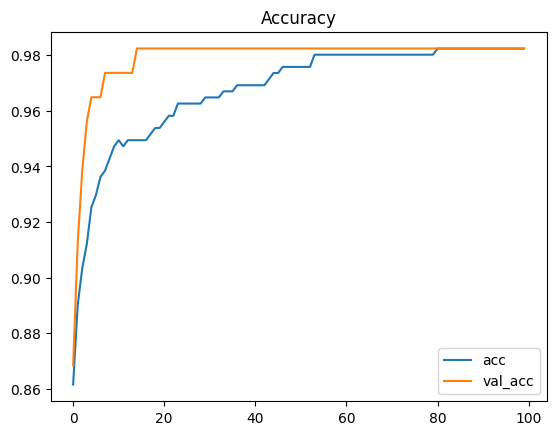

In [26]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

print("---------------------------------")
model.evaluate(X_test, y_test)

plt.title('Loss')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
